<a href="https://colab.research.google.com/github/lishav123/MLS-track-notes-/blob/main/Unsupervised_Learning_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

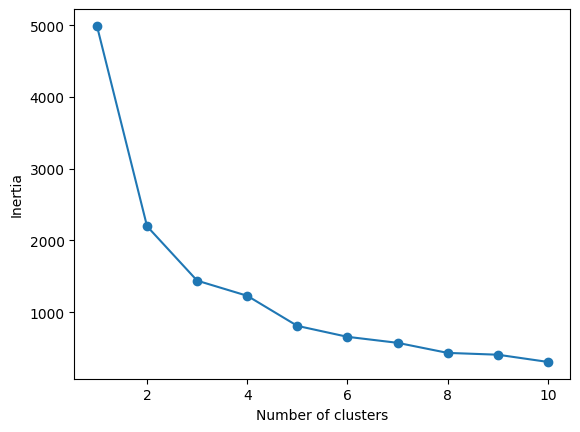

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np

X = load_iris()['data']
X = np.stack([X[:, 0] * X[:, 1], X[:, 2] * X[:, 3]], axis=1)
y = load_iris()['target']

inertias = []
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [3]:
model = KMeans(n_clusters=3)
model.fit(X)
y_pred = model.predict(X)

import pandas as pd
df = pd.DataFrame(X, columns=['sepal area (cm^2)', 'sepal area (cm^2)'])
df['cluster'] = y_pred
df['target'] = y

df

,sepal area (cm^2),sepal area (cm^2),cluster,target
0,17.85,0.28,2,0
1,14.70,0.28,2,0
2,15.04,0.26,2,0
3,14.26,0.30,2,0
4,18.00,0.28,2,0
...,...,...,...,...
145,20.10,11.96,1,2
146,15.75,9.50,0,2
147,19.50,10.40,1,2
148,21.08,12.42,1,2


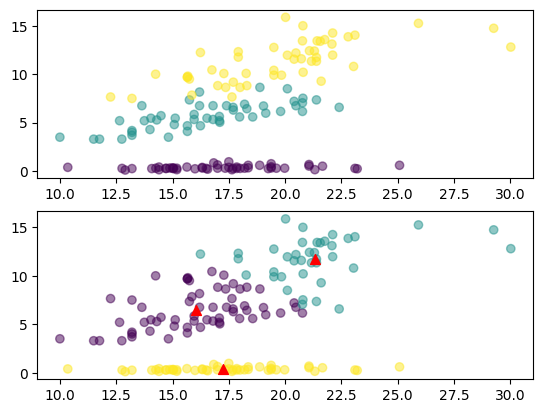

In [4]:
fig, ax = plt.subplots(2)

ax[0].scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
ax[1].scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.5)
ax[1].scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='^', s=50, c='red')
plt.show()

In [5]:
model.cluster_centers_

array([[16.05262295,  6.44180328],
       [21.31615385, 11.74051282],
       [17.2578    ,  0.3656    ]])

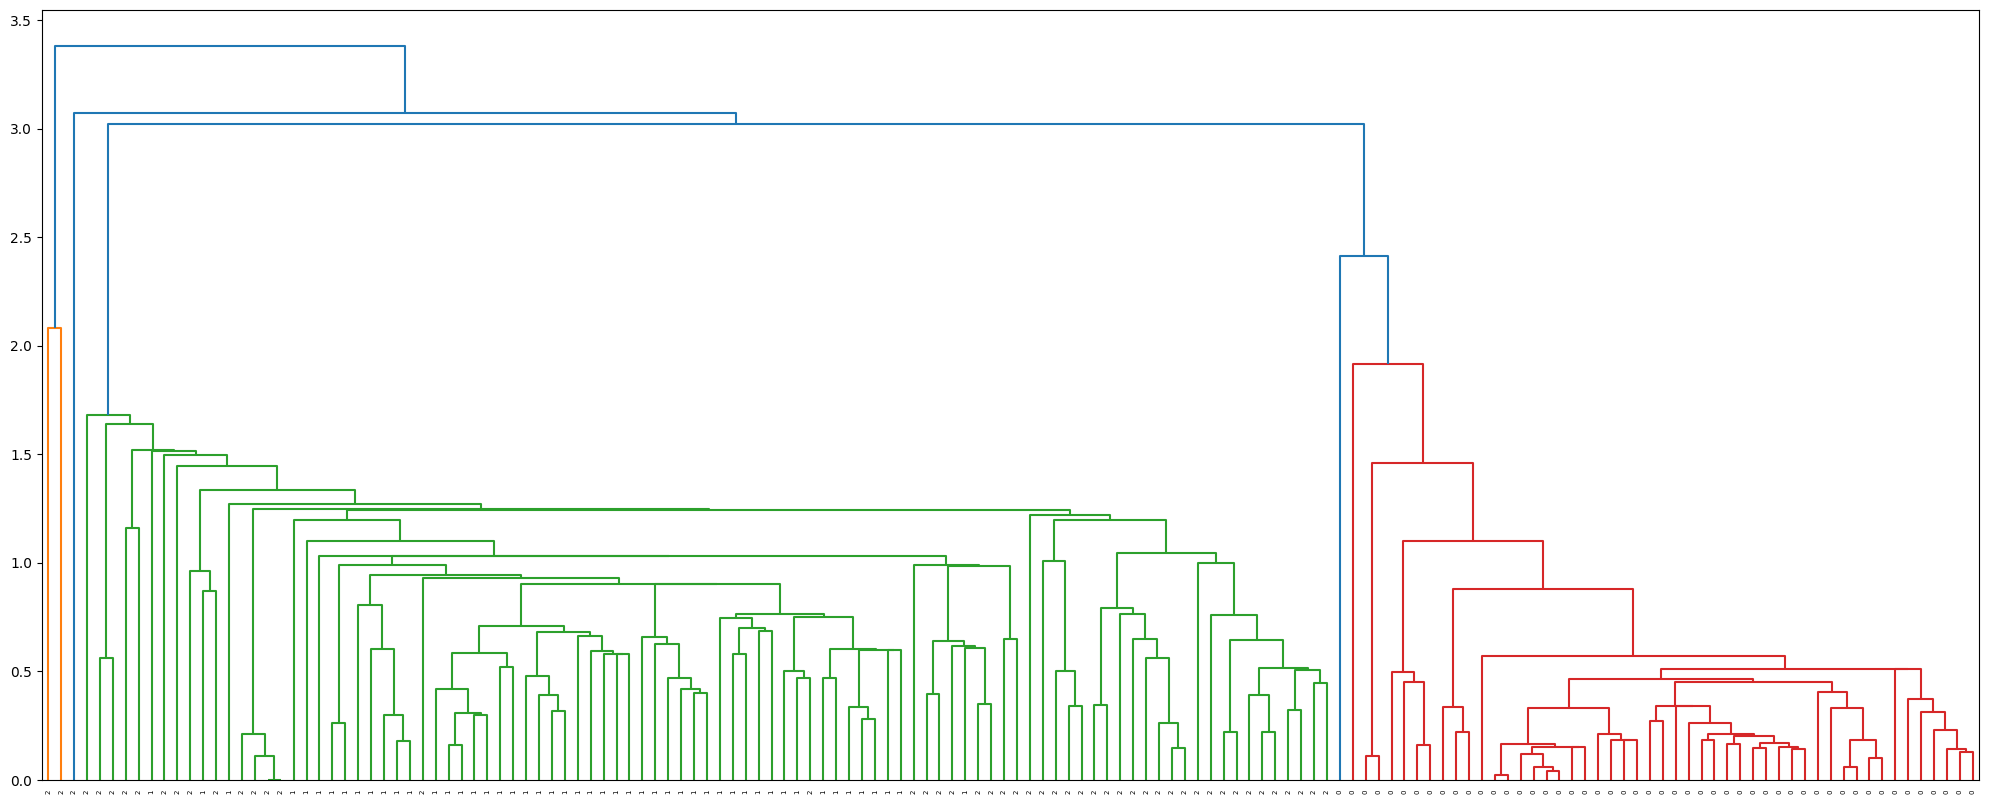

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=y)
plt.show()